# **Estandarizacion de nombres de mascaras, dataset y demas:**
- Al aplicarle una mascara a un dataset seria conveniente primero definir la mascara y en otra linea de codigo aplicarsela al dataset. Esto para que podamos ver bien que le estamos aplicando y que condiciones tiene esa mascara.
- Ojo con utilizar mascaras o alguna otra variable, dataframe y demas, definida mucho mas arriba. No vaya a ser que le cambiemos el nombre por x motivo y nos ollvidamos que mas abajo la usamos para otra cosa y se rompa todo
- Los nombres para las cosas que sean en ingles, separando las palabras con " _ " y en lo posible que se pueda intuir mediante el nombre a que se refiere
- Como practica totalmente arbitraria intentar que los nombres no tengan mas de 5 palabras. ej: " mask_rooms_zeros " , " mask_rooms_surf_zeros " y asi
- Si le llamamos " mask " a algo, que realmente lo sea. No que sea ya una mascara aplicada a un dataset. Eso es el dataset data filtrado por la mascara
- A estos nuevos dataset llamemosle igual que la mascara que le aplicamos solo que reemplazamos el nombre mask por data. ej:  " mask_rooms_zeros "=  " data_rooms_zeros ";                   " data_rooms_surf_zeros " = " data_rooms_surf_zeros "
- Cuando creemos un nuevo dataset, un array, una lista, una serie, mascara o lo que sea poner primero el nombre del tipo de objeto y despues lo que hace, para saber lo que es eso
- Cuando hacemos una mascara para ver si algo es nulo o cero ponemos solo " null ". Es para no alargar los nombres



## Hasta aca realizamos
- Transformacion de todos los ceros a nulos
- Limpieza de filas nulas
- Eliminacion de columnas sin informacion relevante y con informacion redundante
- Eliminacion de state_name que representen menos del 1% del total de instancias
- Correccion en las variables surface_covered_in_m2 y surface_total_in_m2 en los casos que la primera era mayor que la segunda no siendo posible esto
- Imputacion de nulos en la columna place_name (si hacemos el paso del split de place_with_parent_names ese paso hay que eliminarlo)
- imputacion de datos de price_aprox_usd, surface_total_in_m2 y rooms mediante expresiones regulares de las columnas description y title
- Imputacion de datos en surface_covered_in_m2 y surface_total_in_m2 cuando uno era nulo pero el otro no
- Imputacion de las variables surface_total_in_m2, price_aprox_usd y price_usd_per_m2 mediante deduccion de otras variables conocidas
- Definir si se desechan las instancias que representen menos del 1% en funcion del state_name. Este es un problema de granulacion, ya que con la actual nos quedamos con muy pocas instancias para el modelo, pero aumentando la granulacion (haciendo una agregacion de todas estas en una nueva categoria, ej: resto del pais), no desechamos las instancias y solo perdemos granularidad pero no toda la informacion.
- Corregir el patron con el que se busca el precio, para encontrar valores en pesos tambien, haciendo dos grupos, de esta manera el que matchee el grupo dolar se imputa directamente y el que matchee el grupo pesos imputarlo haciendo una conversion del valor. Por facilidad de codigo se imputa el primer grupo que matchea. **GERA , BENKOS Y ERICK**
- Sofisticar los patrones de las expresiones regulares para encontrar mas valores, especialmente en superficie. **GERA , BENKOS Y ERICK**
- La columna operation y country_name contienen una unica variable, en el caso de operation es sell y en el caso de country_name es argentina. No tiene sentido mantener las columnas siendo que no aportan informacion. Definir su tratamiento **PREGUNTAR A FABRI**
- Realizar una imputacion con media condicionada en rooms por superficie, y lugar. **GERA , BENKOS y ERICK** (falta la imputacion que no se bien como hacerla)
- Realizar una imputacion por media condicionada en superficie por media condicionada en rooms y lugar **GERA , BENKOS y ERICK** (falta la imputacion que no se bien como hacerla)
- Revisar si no hay otra forma de determinar el price y el price por metro cuadrado y si no lo hay tirar estas instancias que sean nulas **GERA , BENKOS y ERICK**
- Darle un tratamiento a expensas y floor. En propiedades tipo casas esta bien que sean nulas pero en departamentos no. Igualmente hay informacion ahi, quizas no sea bueno tirarla. *Como propuesta podriamos buscarlo con expresiones regulares en description y title ya que no tenemos de donde mas sacarla* *Tambien se podria ver la correlacion entre las expensas y el lugar y la superficie y si se encuentra una correlacion imputarlo por media condicionada por ejemplo **GERA , BENKOS y ERICK** **PREGUNTAR A FABRI**
## Falta realizar
- Darle un tratamiento a lat y lon y geonames id **VIERNES GERA**
- Creacion de nuevas columnas estilo **Cercania a un espacio verde** **Cercania a un subte** **Mapa de delito** **GERA, BENKOS y ERICK**
- deteccion de outliers
- Desechar las instancias que son outliers y que tienen nulos que no deberian tener
- EDA:  y representacion de datos y medidas estadisticas **PABLO Y ALE**
- Presentacion, formato revision de integridad de informacion **PABLO Y ALE**

# Importacion de librerias utilizadas

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones

#### *Con conocimiento de negocio se validan los datos*
1. price_aprox_usd  ==  mayor a usd 1000 y menor a usd 10000000
2. surface_total_in_m2 == mayor a 10 m2 y menor a 1000000 m2
3. surface_covered_in_m2 == mayor a 10m2 y menor a 10000 m2
4. rooms == mayor a 0 y menor a 100 
5. price_usd_per_m2 == mayor a 100 y menor a 100000

#### Funcion de validacion de datos

In [2]:
def data_validation(dataframe):
   
    mask_validation_price = (data.price_aprox_usd < 1000 ) | (data.price_aprox_usd > 10000000)
    data_condition_validation_price = data[ mask_validation_price ]
    data.loc[data_condition_validation_price.index,"price_aprox_usd"] = np.nan
    
    mask_validation_price_usd_m2 = (data.price_usd_per_m2 < 100) | (data.price_usd_per_m2 > 100000)
    data_validation_price_usd_m2 = data[ mask_validation_price_usd_m2 ]
    data.loc[data_validation_price_usd_m2.index,"price_usd_per_m2"] = np.nan
    
    mask_validation_surface_covered = (data.surface_covered_in_m2 <10) | (data.surface_covered_in_m2 > 10000)
    data_validation_surface_covered = data[ mask_validation_surface_covered ]
    data.loc[data_validation_surface_covered.index,"surface_covered_in_m2"] = np.nan
    
    mask_validation_surface_total = (data.surface_total_in_m2 <10) | (data.surface_total_in_m2 > 1000000) #100 hectareas
    data_validation_surface_total = data[ mask_validation_surface_total ]
    data.loc[data_validation_surface_total.index,"surface_total_in_m2"] = np.nan
    
    mask_validation_rooms = (data.rooms < 1) | (data.rooms > 100)
    data_condition_validation_rooms = data[ mask_validation_rooms ]
    data.loc[data_condition_validation_rooms.index,"rooms"] = np.nan
   
    return data.isnull().sum()

# Carga de la data de Properatti como un DataFrame de Pandas

In [3]:
data_location = "../Data/properatti.csv"

data = pd.read_csv(data_location, index_col=0)
data.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


# Analis preliminar del DataSet

In [4]:
# Se utoliza dtypes para saber que tipo de datos se almacenan en el dataset
data.dtypes

operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: object

In [5]:
# Se ven cuantos valores nulos tenemos por columna
is_null_result = data.isnull().sum()
print(is_null_result)

operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64


In [6]:
# Se ve que porcentaje de nulos tiene cada columna
percentage_null = 100*is_null_result/data.shape[0]
percentage_null

operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000
image_thumbnail                2.567233


## Renombrado de la columna lat-lon

In [7]:
# Se renombra la columna lat-lon para sortear inconvenientes
data.rename(columns={'lat-lon': 'lat_lon'}, inplace=True)

## Verificacion de instancias nulas

In [8]:
# Se comprueban las instancias enteramente nulas y se las desecha 
data_clean_empty_row = data.dropna(axis = 0, how= 'all')
print(data.shape)
print(data_clean_empty_row.shape)
#En este caso no hay ninguna fila con todos los valores nulos

(121220, 25)
(121220, 25)


### Reemplazo de valores iguales a cero por Nan

##### *Se adopta este criterio ya que no existen variables que puedan tomar el valor cero, por lo que se los interpreta como nulos*

In [9]:
# Se reemplazan los ceros por NaN
data[data==0] = np.nan
(data==0).sum()

operation                     0
property_type                 0
place_name                    0
place_with_parent_names       0
country_name                  0
state_name                    0
geonames_id                   0
lat_lon                       0
lat                           0
lon                           0
price                         0
currency                      0
price_aprox_local_currency    0
price_aprox_usd               0
surface_total_in_m2           0
surface_covered_in_m2         0
price_usd_per_m2              0
price_per_m2                  0
floor                         0
rooms                         0
expenses                      0
properati_url                 0
description                   0
title                         0
image_thumbnail               0
dtype: int64

# Tratamiento de columnas con informacion no util o con informacion redundante

## Tratamiento de columnas *properati_url* y *image_thumbnail*

#### Se desechan las columnas *properati_url* y *image_thumbnail* ya que no aportan informacion util

In [10]:
# Se desechan las columnas properati_url y image_thumbnail de data
data = data.drop(['properati_url', 'image_thumbnail'], axis=1)
print("cantidad de columnas actuales=",data.shape[1])

cantidad de columnas actuales= 23


## Tratamiento de columnas *price* , *price_aprox_local_currency* y *price_aprox_usd* 

#### Como existe redundancia entre las columnas **price_aprox_usd**, **price** y **price_aprox_local_currency** se toma la decision de desechar  **price** y **price_aprox_local_currency**
**Se asume igual fiabilidad de los datos en las tres variables**

In [11]:
# Primero se corrobora que no exista mas informacion en las columnas que se van a desechar que en la que va a quedar

# Se hacen tres mascaras para encontrar las instancias que tienen un valor nulo en esa columna
mask_price_null = data.price.isnull()
mask_price_aprox_local_currency_null = data.price_aprox_local_currency.isnull()
mask_price_aprox_usd_null = data.price_aprox_usd.isnull()

# Se hace una interseccion de las tres mascaras
mask_prices_null = mask_price_null & mask_price_aprox_local_currency_null & mask_price_aprox_usd_null

# Si las tres mascaras tienen cada una la misma cantidad de elementos que la interseccion significa que los nulos se encuentran en las mismas instancias
print("Cantidad de nulos en price= " , mask_price_null.sum())
print("cantidad de nulos en price_aprox_local_currency= " , mask_price_aprox_local_currency_null.sum())
print("Cantida de nulos en price_aprox_usd= " , mask_price_aprox_usd_null.sum())
print("Cantidad de nulos en la interseccion de las mascaras= " , mask_prices_null.sum())

# Devuelve un True si la cantidad de nulos es la misma en todas las mascaras por lo que la interseccion es perfecta
print(mask_price_null.sum()==mask_price_aprox_local_currency_null.sum()==mask_price_aprox_usd_null.sum()==mask_prices_null.sum())

Cantidad de nulos en price=  20411
cantidad de nulos en price_aprox_local_currency=  20411
Cantida de nulos en price_aprox_usd=  20411
Cantidad de nulos en la interseccion de las mascaras=  20411
True


In [12]:
# Como se cumple la condicion, se desechan las columnas price, price_aprox_local_currency y currency 
data = data.drop(['price', 'price_aprox_local_currency'], axis=1)
print("cantidad de columnas actuales= ",data.shape[1])

cantidad de columnas actuales=  21


## Tratamiento de columnas *price_usd_per_m2* y *price_per_m2*

#### Como existe redundancia entre las columnas *price_per_m2* y *price_usd_per_m2* se toma la decision de desechar la columna price_per_m2
**Asumimos igual fiabilidad de datos en ambas variables**

In [13]:
# Primero se corrobora que no exista mas informacion en la columna que se va a desechar que en la que va a quedar

# Se hacen dos mascaras para lencontrar las instancias que tienen un valor nulo en esa columna
mask_price_per_m2_null = data.price_per_m2.isnull()
mask_price_usd_per_m2_null = data.price_usd_per_m2.isnull()

# Se hace una interseccion de las dos mascaras
mask_prices_per_m2_null = mask_price_per_m2_null & mask_price_usd_per_m2_null 

# Si las tres mascaras tienen cada una la misma cantidad de elementos que la interseccion significa que los nulos se encuentran siempre en las mismas instancias
print("Cantidad de nulos en price_per_m2= " , mask_price_per_m2_null.sum())
print("cantidad de nulos en price_usd_per_m2= " , mask_price_usd_per_m2_null.sum())
print("Cantidad de nulos en la interseccion de las mascaras= " , mask_prices_per_m2_null.sum())

# Devuelve un True si la cantidad de nulos es la misma en todas las mascaras por lo que la interseccion es perfecta
print(mask_price_per_m2_null.sum()==mask_price_usd_per_m2_null.sum()==mask_prices_per_m2_null.sum())

Cantidad de nulos en price_per_m2=  33562
cantidad de nulos en price_usd_per_m2=  52603
Cantidad de nulos en la interseccion de las mascaras=  28295
False


##### *Como hay mas informacion en una columna que en la otra, en las instancias en que price_usd_per_m2 es nulo pero no lo es price_per_m2, se imputa el valor haciendo una conversion de moneda*

In [14]:
# Se obtienen dos dataframe con el price_usd_per_m2 nnulo y price_per_m2 no nulo diferenciados por la currency
mask_prices_per_m2_USD = data.price_usd_per_m2.isnull() & data.price_per_m2.notnull() & (data.currency == "USD")
data_prices_per_m2_USD = data [mask_prices_per_m2_USD]

mask_prices_per_m2_ARS = data.price_usd_per_m2.isnull() & data.price_per_m2.notnull() & (data.currency == "ARS")
data_prices_per_m2_ARS = data [mask_prices_per_m2_ARS]

# Se define una variable que contenga el valor de conversion de pesos a dolar
pesos = 1/200

# Se imputa en price_usd_per_m2 el valor de price_per_m2 multiplicado por el valor de la conversion de pesos a dolar
data.loc[data_prices_per_m2_USD.index,"price_usd_per_m2"] = data.loc[data_prices_per_m2_USD.index, "price_per_m2"]

# Se imputa en price_usd_per_m2 el valor de price_per_m2 multiplicado por el valor de la conversion de pesos a dolar
data.loc[data_prices_per_m2_ARS.index,"price_usd_per_m2"] = pesos *data.loc[data_prices_per_m2_ARS.index, "price_per_m2"]

In [15]:
# Se desecha la columna price_per_m2
data = data.drop(['price_per_m2'], axis=1)
print("cantidad de columnas actuales= ",data.shape[1])

cantidad de columnas actuales=  20


## Tratamiento de columnas *lat-lon*, *lat* y *lon*

#### Como existe redundancia entre las columnas *lat-lon*, *lat* y *lon* se toma la decision de desechar la columna *lat-lon*
**Asumimos igual fiabilidad de datos en las tres variables**

In [16]:
# Primero se corrobora que no exista mas informacion en la columna que se va a desechar que en lsa que se van a quedar

# Se hacen tres mascaras para encontrar las instancias de latitud y longitud que contengan los nulos de las mismas
mask_lat_lon_null = data.lat_lon.isnull()
mask_lat_null = data.lat.isnull()
mask_lon_null = data.lon.isnull()

# Se hace una interseccion de las tres mascaras
mask_inter_lat_lon_null = mask_lat_lon_null & mask_lat_null & mask_lon_null

# Si las tres mascaras tienen cada una la misma cantidad de elementos que la interseccion significa que los nulos se encuentran siempre en las mismas instancias
print("Cantidad de nulos en lat-lon= " , mask_lat_lon_null.sum())
print("cantidad de nulos en lat= " , mask_lat_null.sum())
print("Cantida de nulos en lon= " , mask_lon_null.sum())
print("Cantidad de nulos en la interseccion de las mascaras= " , mask_inter_lat_lon_null.sum())

# Devuelve un True si la cantidad de nulos es la misma en todas las mascaras por lo que la interseccion es perfecta
print(mask_lat_lon_null.sum()==mask_lat_null.sum()==mask_lon_null.sum()==mask_inter_lat_lon_null.sum())

Cantidad de nulos en lat-lon=  51550
cantidad de nulos en lat=  51550
Cantida de nulos en lon=  51550
Cantidad de nulos en la interseccion de las mascaras=  51550
True


In [17]:
# Como la condicion se cumple, se desecha la columna lat_lon
data = data.drop(['lat_lon'], axis=1)
print("cantidad de columnas actuales= ",data.shape[1])

cantidad de columnas actuales=  19


# Analisis de instancias en funcion del state_name

In [18]:
# Se presentan todos los diferentes state_name que hay en el DataSet
data.state_name.unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [19]:
# Se presentan la cantidad de instancias que acumula cada state_name
state_name_distribution = pd.value_counts(data.state_name)
state_name_distribution

Capital Federal                 32316
Bs.As. G.B.A. Zona Norte        25560
Bs.As. G.B.A. Zona Sur          13952
Córdoba                         12069
Santa Fe                        10172
Buenos Aires Costa Atlántica    10006
Bs.As. G.B.A. Zona Oeste         9322
Buenos Aires Interior            2291
Río Negro                         808
Neuquén                           733
Mendoza                           681
Tucumán                           674
Corrientes                        583
Misiones                          464
Entre Ríos                        369
Salta                             278
Chubut                            259
San Luis                          252
La Pampa                          157
Formosa                            65
Chaco                              57
San Juan                           40
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
La Rioja    

In [20]:
# Se presentan los porcentajes de la distribucion de los datos por state_name
total_data = data.shape[0]
percentage_state_name = 100*state_name_distribution/total_data
percentage_state_name

Capital Federal                 26.658967
Bs.As. G.B.A. Zona Norte        21.085629
Bs.As. G.B.A. Zona Sur          11.509652
Córdoba                          9.956278
Santa Fe                         8.391355
Buenos Aires Costa Atlántica     8.254413
Bs.As. G.B.A. Zona Oeste         7.690150
Buenos Aires Interior            1.889952
Río Negro                        0.666557
Neuquén                          0.604686
Mendoza                          0.561788
Tucumán                          0.556014
Corrientes                       0.480944
Misiones                         0.382775
Entre Ríos                       0.304405
Salta                            0.229335
Chubut                           0.213661
San Luis                         0.207886
La Pampa                         0.129517
Formosa                          0.053622
Chaco                            0.047022
San Juan                         0.032998
Tierra Del Fuego                 0.025573
Catamarca                        0

### Se toma la decision de desechar las instancias correspondientes a los *state_name* que representan < 1% del total de instancias.

#### **Tomamos esta decision ya que consideramos que en estos state_names no contamos con las instancias suficientes como para realizar un analisis fiable**

In [21]:
# Se le aplica una mascara a la serie percentage_state_name con la condicion de que el state_name sea mayor a 1%
mask_1_percent = percentage_state_name > 1
series_1_percent = percentage_state_name [mask_1_percent]
print(f'Se desecha el  {round(100 - series_1_percent.sum(), 2)}% del total de los datos')
round(series_1_percent, 2)

Se desecha el  4.56% del total de los datos


Capital Federal                 26.66
Bs.As. G.B.A. Zona Norte        21.09
Bs.As. G.B.A. Zona Sur          11.51
Córdoba                          9.96
Santa Fe                         8.39
Buenos Aires Costa Atlántica     8.25
Bs.As. G.B.A. Zona Oeste         7.69
Buenos Aires Interior            1.89
Name: state_name, dtype: float64

In [22]:
# Se descartan las instancias en las que su state_name no este dentro del indice de la serie series_1_percent
data = data[data.state_name.isin(series_1_percent.index)]

## Desagregacion de la columna place_with_parent_names

**Consideracion:** *Capital federal esta considerado como state_name, por lo que en city_name iran los barrios de la ciudad*

##### **Para realizar esto se asume igual fiabilidad en los datos de las columnas place_name, country_name, state_name y place_with_parent_names**

In [23]:
#  Se realiza un split a la columna place_with_parent_names
data_place_with_parent_names = data["place_with_parent_names"].str.split("|", expand=True)
data_place_with_parent_names.head(3)

,0,1,2,3,4,5,6
0,,Argentina,Capital Federal,Mataderos,,None,None
1,,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,None,None
2,,Argentina,Capital Federal,Mataderos,,None,None


In [24]:
# Se descartan las columnas 0, 5 y 6 ya que contienen no contienen informacion
data_place_with_parent_names = data_place_with_parent_names.drop([0,5,6], axis=1)

In [25]:
# Se renombran las columnas
data_place_with_parent_names.rename(columns={1: 'country_name' , 2 : 'state_name' , 3 : 'city_name' , 4 : 'neighborhood_name'}, inplace=True)
data_place_with_parent_names.columns

Index(['country_name', 'state_name', 'city_name', 'neighborhood_name'], dtype='object')

In [26]:
# Se visualiza el total de strings vacios ""
print( "El total de strings vacios es= \n" , data_place_with_parent_names.isnull().sum())
# Se visualiza el total de nulos
print( "El total de nulos es= \n" , (data_place_with_parent_names=='').sum())

El total de strings vacios es= 
 country_name            0
state_name              0
city_name               0
neighborhood_name    4422
dtype: int64
El total de nulos es= 
 country_name             0
state_name               0
city_name             4422
neighborhood_name    71487
dtype: int64


In [27]:
# Se reemplazan las cadenas vacias en city_name a nulos
data_city_name_empty = data_place_with_parent_names[data_place_with_parent_names.city_name==""]
data_place_with_parent_names.loc[data_city_name_empty.index,"city_name"] = None

# Se reemplazan las cadenas vacias en neighborhood_name a nulos
data_neighborhood_name_empty = data_place_with_parent_names[data_place_with_parent_names.neighborhood_name==""]
data_place_with_parent_names.loc[data_neighborhood_name_empty.index,"neighborhood_name"] = None

In [28]:
# Se visualiza el total de strings vacios ""
print( "El total de nulos es= \n" , data_place_with_parent_names.isnull().sum())

# Se visualiza el total de nulos
print( "El total de strings vacios es= \n" , (data_place_with_parent_names=='').sum())

El total de nulos es= 
 country_name             0
state_name               0
city_name             4422
neighborhood_name    75909
dtype: int64
El total de strings vacios es= 
 country_name         0
state_name           0
city_name            0
neighborhood_name    0
dtype: int64


In [29]:
# Se eliminan en data las columnas que se van a reemplazar
data = data.drop(["place_name","place_with_parent_names","country_name","state_name"], axis=1)

In [30]:
# Se concatena data con data_place_with_parent_names. Se realiza con concat ya que tienen el mismo orden las instancias 
data = pd.concat([data, data_place_with_parent_names], axis=1)
data.columns

Index(['operation', 'property_type', 'geonames_id', 'lat', 'lon', 'currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'description',
       'title', 'country_name', 'state_name', 'city_name',
       'neighborhood_name'],
      dtype='object')

In [31]:
# Se reordenan las columnas para que queden en el orden original
data= data[['operation', 'property_type','country_name', 'state_name', 'city_name', 
            'neighborhood_name', 'geonames_id', 'lat', 'lon','price_aprox_usd', 
            'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'description',
       'title',]]

# Validacion de datos

In [32]:
data.isnull().sum()

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17871
surface_total_in_m2       37437
surface_covered_in_m2     17746
price_usd_per_m2          25390
floor                    108073
rooms                     69989
expenses                 101758
description                   2
title                         0
dtype: int64

In [33]:
data_validation(data)

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17882
surface_total_in_m2       37437
surface_covered_in_m2     18190
price_usd_per_m2          26966
floor                    108073
rooms                     69989
expenses                 101758
description                   2
title                         0
dtype: int64

# Analisis preliminar de los datos

count    9.780600e+04
mean     2.380722e+05
std      3.171732e+05
min      4.666620e+03
25%      9.000000e+04
50%      1.450000e+05
75%      2.673465e+05
max      9.900000e+06
Name: price_aprox_usd, dtype: float64


C:\Users\gtoso\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gtoso\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


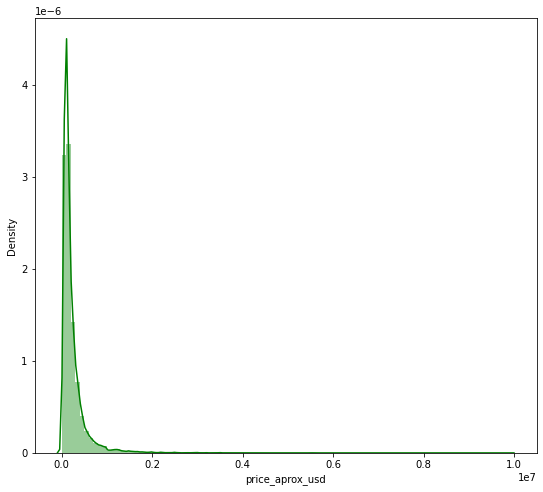

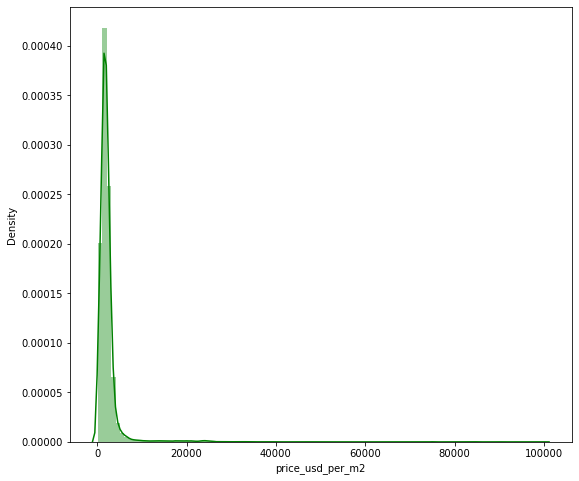

In [34]:
print(data['price_aprox_usd'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['price_aprox_usd'], color='g', bins=100, hist_kws={'alpha': 0.4});

plt.figure(figsize=(9, 8))
sns.distplot(data['price_usd_per_m2'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<AxesSubplot:title={'center':'geonames_id'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>],
       [<AxesSubplot:title={'center':'price_aprox_usd'}>,
        <AxesSubplot:title={'center':'surface_total_in_m2'}>,
        <AxesSubplot:title={'center':'surface_covered_in_m2'}>],
       [<AxesSubplot:title={'center':'price_usd_per_m2'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'expenses'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

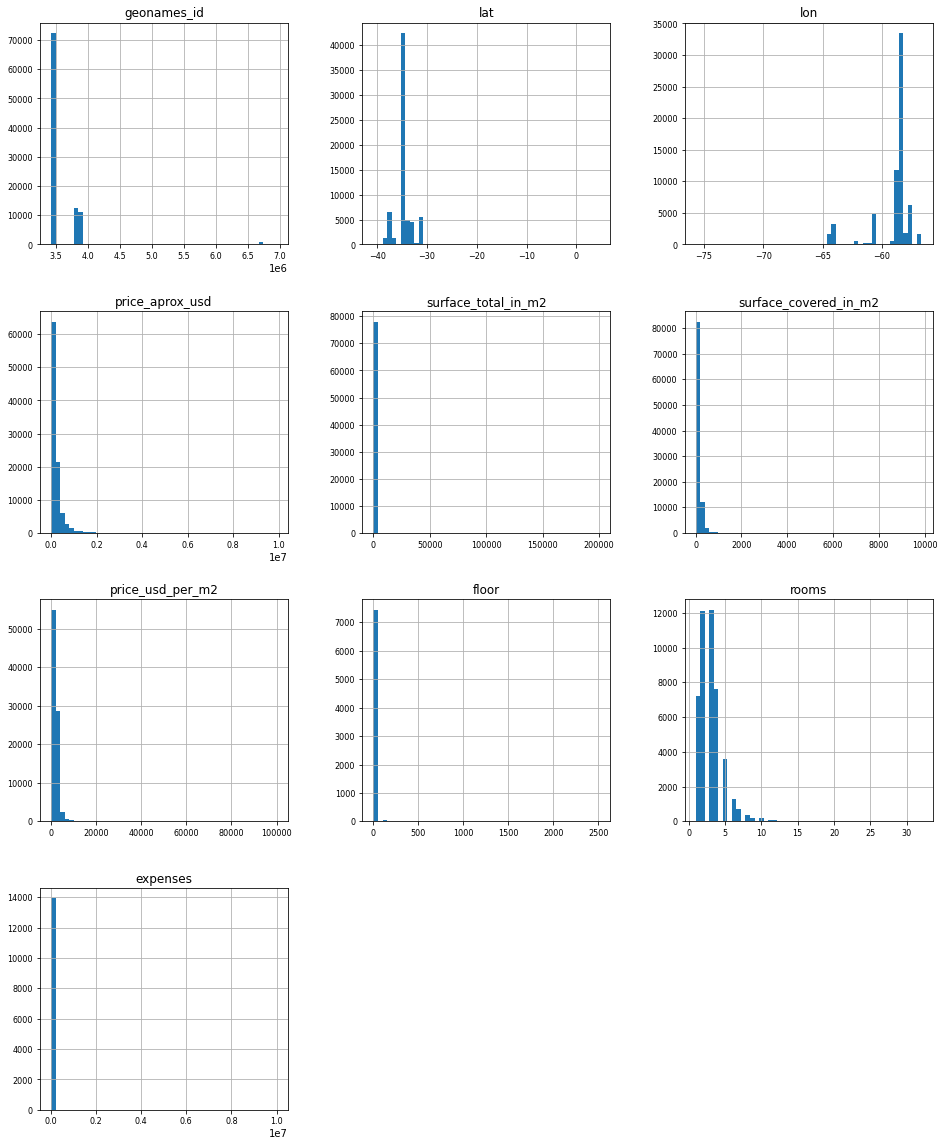

In [35]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [36]:
data_num_corr = data.corr()['price_usd_per_m2']
data_num_corr

geonames_id             -0.030388
lat                      0.080686
lon                     -0.027284
price_aprox_usd          0.253192
surface_total_in_m2     -0.067295
surface_covered_in_m2   -0.107614
price_usd_per_m2         1.000000
floor                   -0.005579
rooms                   -0.088520
expenses                 0.005271
Name: price_usd_per_m2, dtype: float64

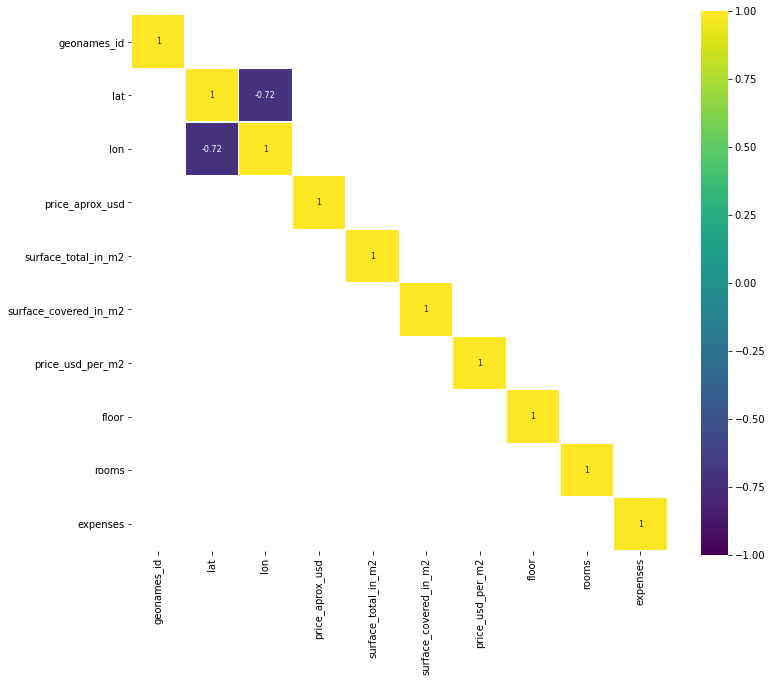

In [37]:
corr = data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

## Correccion de instancias que tienen surface_total_in_m2 < surface_covered_in_m2

In [38]:
# Se corrobora en que casos el valor surface_total_in_m2 es menor que el valor surface_covered_in_m2
mask_surface = data.surface_total_in_m2 < data.surface_covered_in_m2
data_surface = data[mask_surface]

# Se generan dos listas con los valores de surface_total_in_m2 y surface_covered_in_m2 en las instancias con el index de data_surface
list_a = data_surface.surface_total_in_m2
list_b = data_surface.surface_covered_in_m2

# Se le asigna en funcion del index de data_surface, los valores de surface_total_in_m2 a surface_covered_in_m2 y viceversa
data.loc[data_surface.index, "surface_total_in_m2"] = list_b
data.loc[data_surface.index, "surface_covered_in_m2"] = list_a

# Imputacion de datos faltantes

# Logica a seguir para la imputacion de datos faltantes
1. Imputacion de datos obtenidos mediante expresiones regulares en las columnas description y title
2. Imputacion directa mediante deduccion con valores de otras columnas
3. Imputacion mediante media condicionada (esta metodologia no se aplica en columnas de precio)

## Obtencion de datos con expresiones regulares de las columnas *description* y *title*

## Obtencion de rooms con expresiones regulares

##### *Se obtienen los rooms nulos en primera instancia con expresiones regulares. No se obtienen primero con una media condicionada de la superficie cubierta y el lugar ya que es mas preciso obtenerlos con un dato directo del dataset*

### Obtencion de rooms con expresion regular en *description*

In [39]:
# Se obtiene a partir de data una serie que contenga las instancias con rooms nulos
mask_rooms_null =  data.rooms.isnull()
data_rooms_null = data [mask_rooms_null]
series_rooms_null_description = data_rooms_null.description

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_rooms_null_description.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  69989


In [40]:
# logica del patron: Toma un numero de un digito o mas,seguido o no de un espacio o mas y de las letras amb no distinguiendo entre mayusculas y minusculas
pattern = "(?P<rooms>\d+)\s+(?i)amb"
pattern_rooms_regex = re.compile(pattern)

C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\3898365534.py:3: DeprecationWarning: Flags not at the start of the expression '(?P<rooms>\\d+)\\s+(?i' (truncated)
  pattern_rooms_regex = re.compile(pattern)


In [41]:
# Se aplica una funcion lamda para recorrer la serie series_rooms_null_description aplicando la expresion regular
description_rooms_result = series_rooms_null_description.apply(lambda x: pattern_rooms_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
description_rooms_match = description_rooms_result.apply(lambda x: np.nan if x is None else x.group('rooms'))

print("Rooms matcheados=",(description_rooms_match.notnull()).sum()) # Se ve la cantidad que pudo matchear
print(description_rooms_match.unique()) # Se ven todos los rooms unicos que matcheo

Rooms matcheados= 18608
['2' nan '3' '1' '4' '7' '5' '6' '9' '2017' '103' '297' '072' '000' '11'
 '8' '085' '37' '800' '10' '12' '900' '0002' '400' '20174' '006' '17' '90'
 '0001' '772' '2004' '14' '24' '50' '20' '23' '65' '20173']


In [42]:
# Se imputa la serie description_rooms_match con su index en data
data.loc[description_rooms_match.index, "rooms"] = description_rooms_match 

### Obtencion de rooms con expresion regular en *title*

In [43]:
# Se obtiene a partir de data una serie que contenga las instancias con rooms nulos
mask_rooms_null = data.rooms.isnull()
data_rooms_null = data [mask_rooms_null]
series_rooms_null_title = data_rooms_null.title

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_rooms_null_title.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  51381


In [44]:
# Se aplica una funcion lamda para recorrer la serie series_rooms_null_title aplicando la expresion regular
title_rooms_result = series_rooms_null_title.apply(lambda x: pattern_rooms_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
title_rooms_match = title_rooms_result.apply(lambda x: np.nan if x is None else x.group('rooms'))

print("Rooms matcheados=",(title_rooms_match.notnull()).sum())  # Se ve la cantidad que pudo matchear
print(title_rooms_match.unique()) # Se ven todos los rooms unicos que matcheo

Rooms matcheados= 2505
[nan '2' '6' '3' '4' '5' '9' '1' '7' '8' '15' '4000' '360' '12']


In [45]:
# Se imputa la serie title_rooms_match con su index en data
data.loc[title_rooms_match.index, "rooms"] = title_rooms_match 

In [46]:
# Se cambia el tipo de dato de object a float
data["rooms"] = data["rooms"].astype("float")
data.rooms.dtypes

dtype('float64')

#### Validacion de datos

In [47]:
data_validation(data)

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17882
surface_total_in_m2       37437
surface_covered_in_m2     18190
price_usd_per_m2          26966
floor                    108073
rooms                     48903
expenses                 101758
description                   2
title                         0
dtype: int64

## Obtencion de surface_total_in_m2 con expresiones regulares

##### *Se obtienen la superficie en la que ambas superficies sean nulas y el precio y el precio por metro cuadrado es nulo. De esta manera sabemos que no podemos imputar una superficie con la otra y no podemos inferir la superficie mediante el precio y el precio por metro cuadrado*

### Obtencion de surface_total_in_m2 con expresion regular en *description*

In [48]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
surfaces_condition = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.isnull()
price_condition = data.price_aprox_usd.isnull()
price_per_m2_condition = data.price_usd_per_m2.isnull()
mask_surface_total_in_m2_null = surfaces_condition & (price_condition | price_per_m2_condition)
data_surface_total_in_m2_null = data [mask_surface_total_in_m2_null]
series_surface_total_in_m2_null_description = data_surface_total_in_m2_null.description

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_surface_total_in_m2_null_description.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  11627


In [49]:
# logica del patron: Toma un numero de un digito o mas,seguido o no de un espacio o mas y de las letras [m2,mts,metro] no distinguiendo entre mayusculas y minusculas
pattern = "(?P<surface_total_in_m2>\d+)\s+(?i)[m2|mts|metro]"
pattern_surface_total_in_m2_regex = re.compile(pattern)

C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\786532533.py:3: DeprecationWarning: Flags not at the start of the expression '(?P<surface_total_in' (truncated)
  pattern_surface_total_in_m2_regex = re.compile(pattern)


In [50]:
# Se aplica una funcion lamda para recorrer la serie series_surface_total_in_m2_null_description aplicando la expresion regular
description_surface_total_in_m2_result = series_surface_total_in_m2_null_description.apply(lambda x: pattern_surface_total_in_m2_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
description_surface_total_in_m2_match = description_surface_total_in_m2_result.apply(lambda x: np.nan if x is None else x.group('surface_total_in_m2'))

print("surfaces matcheados=",(description_surface_total_in_m2_match.notnull()).sum()) #aca veo que cantidad pudo matchear

surfaces matcheados= 4176


In [51]:
# Se imputa la serie description_surface_total_in_m2_match con su index en data
data.loc[description_surface_total_in_m2_match.index, "surface_total_in_m2"] = description_surface_total_in_m2_match 

### Obtencion de surface_total_in_m2 con expresion regular en *title*

In [52]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
surfaces_condition = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.isnull()
price_condition = data.price_aprox_usd.isnull()
price_per_m2_condition = data.price_usd_per_m2.isnull()
mask_surface_total_in_m2_null = surfaces_condition & (price_condition | price_per_m2_condition)
data_surface_total_in_m2_null = data [mask_surface_total_in_m2_null]
series_surface_total_in_m2_null_title = data_surface_total_in_m2_null.title

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_surface_total_in_m2_null_description.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  11627


In [53]:
# Se aplica una funcion lamda para recorrer la serie series_surface_total_in_m2_null_title aplicando la expresion regular
title_surface_total_in_m2_result = series_surface_total_in_m2_null_title.apply(lambda x: pattern_surface_total_in_m2_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
title_surface_total_in_m2_match = title_surface_total_in_m2_result.apply(lambda x: np.nan if x is None else x.group('surface_total_in_m2'))

print("surfaces matcheados= ",(title_surface_total_in_m2_match.notnull()).sum()) #aca veo que cantidad pudo matchear

surfaces matcheados=  115


In [54]:
# Se imputa la serie title_surface_total_in_m2_match con su index en data
data.loc[title_surface_total_in_m2_match.index, "surface_total_in_m2"] = title_surface_total_in_m2_match 

In [55]:
# Se cambia el tipo de dato de object a float
data["surface_total_in_m2"] = data["surface_total_in_m2"].astype("float")
data.surface_total_in_m2.dtypes

dtype('float64')

#### Validacion de datos

In [56]:
data_validation(data)

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17882
surface_total_in_m2       34165
surface_covered_in_m2     18190
price_usd_per_m2          26966
floor                    108073
rooms                     48903
expenses                 101758
description                   2
title                         0
dtype: int64

#### Validacion de datos## Obtencion de price_aprox_usd mediante expresiones regulares

##### *Se quiere obtener el price_aprox_usd para las instancias en las que no tenemos price_aprox_usd y tampoco tenemos surface_total_in_m2 y surface_total_in_m2 o no tenemos price_usd_per_m2 y price_per_m2 *

### Obtencion de price con expresion regular en *description*

In [57]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
surface_condition = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.isnull()
price_condition = data.price_aprox_usd.isnull()
price_per_m2_condition = data.price_usd_per_m2.isnull()
mask_price_null = price_condition & (price_per_m2_condition | surfaces_condition)
data_price_null = data [mask_price_null]
series_price_null_description = data_price_null.description

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_price_null_description.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  17877


In [58]:
# logica del patron: toma la combinacion de letras usd indistintamente de ser mayusculas o minusculas seguido o no de un espacio o mas y seguido de un numero de un numero de un digito o mas
pattern = "(?i)usd\s{0,1}(?P<price_aprox_usd>\d+)"
pattern_price_regex = re.compile(pattern)

In [59]:
# Se aplica una funcion lamda para recorrer la serie series_surface_total_in_m2_null_description aplicando la expresion regular
description_price_result = series_price_null_description.apply(lambda x: pattern_price_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
description_price_match = description_price_result.apply(lambda x: np.nan if x is None else x.group('price_aprox_usd'))

print("price matcheados= ",(description_price_match.notnull()).sum()) #aca veo que cantidad pudo matchear

price matcheados=  406


In [60]:
# Se imputa la serie description_price_match con su index en data
data.loc[description_price_match.index, "price_aprox_usd"] = description_price_match 

### Obtencion de price con expresion regular en *title*

In [61]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
surface_condition = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.isnull()
price_condition = data.price_aprox_usd.isnull()
price_per_m2_condition = data.price_usd_per_m2.isnull()
mask_price_null = price_condition & (price_per_m2_condition | surfaces_condition)
data_price_null = data [mask_price_null]
series_price_null_title = data_price_null.title

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_price_null_description.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  17877


In [62]:
# Se aplica una funcion lamda para recorrer la serie series_price_null_title aplicando la expresion regular
title_price_result = series_price_null_title.apply(lambda x: pattern_price_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
title_price_match = title_price_result.apply(lambda x: np.nan if x is None else x.group('price_aprox_usd'))

print("price matcheados= ",(title_price_match.notnull()).sum()) #aca veo que cantidad pudo matchear

price matcheados=  1


In [63]:
# Se imputa la serie title_price_match con su index en data
data.loc[title_price_match.index, "price_aprox_usd"] = title_price_match 

In [64]:
# Se cambia el tipo de dato de object a float
data["price_aprox_usd"] = data["price_aprox_usd"].astype("float")
data.price_aprox_usd.dtypes

dtype('float64')

#### Validacion de datos

In [65]:
data_validation(data)

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17862
surface_total_in_m2       34165
surface_covered_in_m2     18190
price_usd_per_m2          26966
floor                    108073
rooms                     48903
expenses                 101758
description                   2
title                         0
dtype: int64

## Obtencion de floor mediante expresiones regulares

##### *Se quiere obtener el floor para las instancias en las que es nulo*

### Obtencion de floor con expresion regular en *description*

In [66]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
data_floor_null = data [data.floor.isnull()]
series_floor_null_description = data_floor_null.description

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_floor_null_description.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  108073


In [67]:
# logica del patron: Toma un valor numerico o mas, seguido de un espacio o mas o ninguno, seguido de la palabra piso indistintamente que sean mayusculas o minusculas
pattern = "(?P<floor>\d+)\s+(?i)piso" 
pattern_floor_regex = re.compile(pattern)

C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\2505478835.py:3: DeprecationWarning: Flags not at the start of the expression '(?P<floor>\\d+)\\s+(?i' (truncated)
  pattern_floor_regex = re.compile(pattern)


In [68]:
# Se aplica una funcion lamda para recorrer la serie series_floor_null_description aplicando la expresion regular
description_floor_result = series_floor_null_description.apply(lambda x: pattern_floor_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
description_floor_match = description_floor_result.apply(lambda x: np.nan if x is None else x.group('floor'))

print("floor matcheados= ",(description_floor_match.notnull()).sum()) #aca veo que cantidad pudo matchear

floor matcheados=  6842


In [69]:
# Se imputa la serie description_floor_match con su index en data
data.loc[description_floor_match.index, "floor"] = description_floor_match 

### Obtencion de floor con expresion regular en *title*

In [70]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
data_floor_null = data [data.floor.isnull()]
series_floor_null_title = data_floor_null.title

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_floor_null_title.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  101231


In [71]:
# Se aplica una funcion lamda para recorrer la serie series_floor_null_title aplicando la expresion regular
title_floor_result = series_floor_null_title.apply(lambda x: pattern_floor_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
title_floor_match = title_floor_result.apply(lambda x: np.nan if x is None else x.group('floor'))

print("floor matcheados= ",(title_floor_match.notnull()).sum()) #aca veo que cantidad pudo matchear

floor matcheados=  113


In [72]:
# Se imputa la serie title_floor_match con su index en data
data.loc[title_floor_match.index, "floor"] = title_floor_match 

In [73]:
# Se cambia el tipo de dato de object a float
data["floor"] = data["floor"].astype("float")
data.floor.dtypes

dtype('float64')

## Obtencion de expenses mediante expresiones regulares

##### *Se quiere obtener el expensas para las instancias en las que es nulo

### Obtencion de expenses con expresion regular en *description*

In [74]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
data_expenses_null = data [data.expenses.isnull()]
series_expenses_null_description = data_expenses_null.description

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_expenses_null_description.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  101758


In [75]:
# logica del patron: Toma un valor numerico o mas, seguido de un espacio o mas o ninguno, seguido de la palabra exp indistintamente que sean mayusculas o minusculas
pattern = "(?P<expenses>\d+)\s+(?i)exp"
pattern_expenses_regex = re.compile(pattern)

C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\2993959463.py:3: DeprecationWarning: Flags not at the start of the expression '(?P<expenses>\\d+)\\s+' (truncated)
  pattern_expenses_regex = re.compile(pattern)


In [76]:
# Se aplica una funcion lamda para recorrer la serie series_expenses_null_description aplicando la expresion regular
description_expenses_result = series_expenses_null_description.apply(lambda x: pattern_expenses_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
description_expenses_match = description_expenses_result.apply(lambda x: np.nan if x is None else x.group('expenses'))

print("expenses matcheados= ",(description_expenses_match.notnull()).sum()) #aca veo que cantidad pudo matchear

expenses matcheados=  153


In [77]:
# Se imputa la serie description_expenses_match con su index en data
data.loc[description_expenses_match.index, "floor"] = description_expenses_match 

### Obtencion de expenses con expresion regular en *title*

In [78]:
# Se obtiene a partir de data una serie que contenga las instancias en las que se va a aplicar la expresion regular
data_expenses_null = data [data.expenses.isnull()]
series_expenses_null_title = data_expenses_null.title

print("Cantidad de instancias en las que se va a aplicar la expresion regular= ",series_expenses_null_title.shape[0])

Cantidad de instancias en las que se va a aplicar la expresion regular=  101758


In [79]:
# Se aplica una funcion lamda para recorrer la serie series_expenses_null_title aplicando la expresion regular
title_expenses_result = series_expenses_null_title.apply(lambda x: pattern_expenses_regex.search(str(x)))

# Se extraen los datos que usaremos para la imputación
title_expenses_match = title_expenses_result.apply(lambda x: np.nan if x is None else x.group("expenses"))

print("expenses matcheados= ",(title_expenses_match.notnull()).sum()) #aca veo que cantidad pudo matchear

expenses matcheados=  6


In [80]:
# Se imputa la serie title_expenses_match con su index en data
data.loc[title_expenses_match.index, "expenses"] = title_expenses_match 

In [81]:
# Se cambia el tipo de dato de object a float
data["expenses"] = data["expenses"].astype("float")
data.expenses.dtypes

dtype('float64')

# Obtencion de datos mediante imputacion directa

## Obtencion de surface_total_in_m2 y surface_covered_in_m2 mediante imputacion directa

### Imputacion de surface_total_in_m2 y surface_covered_in_m2

#### *Cuando una sea nula y la otra no se imputara en la nula el valor de la no nula*

In [82]:
# Se obtiene un dataframe con los valores no nulos de surface_covered_in_m2 y nulos de surface_total_in_m2
mask_surface_total_in_m2_null = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.notnull()
data_surface_total_in_m2_null = data[mask_surface_total_in_m2_null]

# Se obtiene un dataframe con los valores nulos de surface_covered_in_m2 y no nulos de surface_total_in_m2
mask_surface_covered_in_m2_null =  data.surface_total_in_m2.notnull() & data.surface_covered_in_m2.isnull()
data_surface_covered_in_m2_null = data[mask_surface_covered_in_m2_null]


print ("Cantidad de instancias de surface_covered_in_m2 a imputar en surface_total_in_m2= ", data_surface_total_in_m2_null.shape[0])
print ("Cantidad de instancias de surface_total_in_m2 a imputar en surface_covered_in_m2= ", data_surface_covered_in_m2_null.shape[0])

Cantidad de instancias de surface_covered_in_m2 a imputar en surface_total_in_m2=  25709
Cantidad de instancias de surface_total_in_m2 a imputar en surface_covered_in_m2=  9734


In [83]:
# Imputacion de valores nulos de surface_total_in_m2 con valores no nulos de surface_covered_in_m2
data.loc[data_surface_total_in_m2_null.index, "surface_total_in_m2"] = data_surface_total_in_m2_null.loc[data_surface_total_in_m2_null.index, "surface_covered_in_m2"]

# Imputacion de valores nulos de surface_covered_in_m2 con valores no nulos de surface_total_in_m2
data.loc[data_surface_covered_in_m2_null.index, "surface_covered_in_m2"] = data_surface_covered_in_m2_null.loc[data_surface_covered_in_m2_null.index, "surface_total_in_m2"]

### Obtención de las surface_total_in_m2 y surface_covered_in_m2 nulas en funcion del price_aprox_usd y de price_usd_per_m2

##### El valor de surface_total_in_m2 y surface_covered_in_m2 se obtiene mediante la formula **surface_total_in_m2 = price_aprox_usd / price_usd_per_m2**

In [84]:
# Se obtiene un dataframe con los valores nulos de ambas variables de surfaces, no nulos de price_aprox_usd y no nulos de price_usd_per_m2
condition_surfaces_null = data.surface_total_in_m2.isnull() & data.surface_covered_in_m2.isnull()
condition_price_notnull = data.price_aprox_usd.notnull()
condition_price_per_m2_notnull = data.price_usd_per_m2.notnull()
mask_surfaces_imput = condition_surfaces_null & condition_price_notnull & condition_price_per_m2_notnull
data_surfaces_imput = data[mask_surfaces_imput]

print ("Cantidad de instancias de surface_total_in_m2 a imputar= ", data_surfaces_imput.shape[0])

Cantidad de instancias de surface_total_in_m2 a imputar=  101


In [85]:
# Se imputa el valor de surface_covered_in_m2 y surface_total_in_m2 como surface_total_in_m2 = price_aprox_usd / price_usd_per_m2
data.loc[data_surfaces_imput.index,["surface_covered_in_m2" , "surface_total_in_m2"]] = data.loc[data_surfaces_imput.index, "price_aprox_usd"] / data.loc[data_surfaces_imput.index, "price_usd_per_m2"]

### Obtencion de price_aprox_usd mediante imputacion directa en funcion de prices_usd_per_m2 y surface_total_in_m2

##### El valor de price_aprox_usd se obtiene mediante la formula **price_aprox_usd = price_usd_per_m2 * surface_total_in_m2**

In [86]:
# Se obtiene un dataframe con los valores no nulos de cualquiera de las dos surfaces, nulos de price_aprox_usd y no nulos de price_usd_per_m2
condition_surfaces_notnull = data.surface_total_in_m2.notnull() | data.surface_covered_in_m2.notnull()
condition_price_null =  data.price_aprox_usd.isnull()
condition_price_per_m2_notnull = data.price_usd_per_m2.notnull()
mask_prices_imput = condition_surfaces_null & condition_price_notnull & condition_price_per_m2_notnull
data_prices_imput = data[mask_prices_imput]

print ("Cantidad de instancias de price_aprox_usd a imputar= ", data_prices_imput.shape[0])

Cantidad de instancias de price_aprox_usd a imputar=  101


In [87]:
# Se imputa el valor de price_aprox_usd como price_aprox_usd = price_usd_per_m2 / surface_total_in_m2
data.loc[data_prices_imput.index,"price_aprox_usd"] = data.loc[data_prices_imput.index, "price_usd_per_m2"] * data.loc[data_prices_imput.index, "surface_total_in_m2"]

### Obtencion de price_usd_per_m2 mediante imputacion directa en funcion de surface y price

##### El valor de price_usd_per_m2 se obtiene mediante la formula **price_usd_per_m2 = price_aprox_in_usd / surface_total_in_m2**

In [88]:
# Se obtiene un dataframe con los valores no nulos de cualquiera de las dos surfaces, no nulos de price_aprox_usd y nulos de price_usd_per_m2
condition_surfaces_notnull = data.surface_total_in_m2.notnull() | data.surface_covered_in_m2.notnull()
condition_price_notnull = data.price_aprox_usd.notnull()
condition_price_per_m2_null = data.price_usd_per_m2.isnull()
mask_prices_per_m2_imput = condition_surfaces_notnull & condition_price_notnull & condition_price_per_m2_null
data_prices_per_m2_imput = data[mask_prices_per_m2_imput]

print ("Cantidad de instancias de price_usd_per_m2 a imputar= ", data_prices_per_m2_imput.shape[0])

Cantidad de instancias de price_usd_per_m2 a imputar=  3332


In [89]:
# Se imputa el valor de price_usd_per_m2 como price_usd_per_m2 = price_aprox_usd / surface_total_in_m2
data.loc[data_prices_per_m2_imput.index,"price_usd_per_m2"] = data.loc[data_prices_per_m2_imput.index, "price_aprox_usd"] / data.loc[data_prices_per_m2_imput.index, "surface_total_in_m2"]

#### Validacion de datos

In [90]:
print(data_validation(data), data.shape)

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17862
surface_total_in_m2        8448
surface_covered_in_m2      8613
price_usd_per_m2          24371
floor                    113622
rooms                     48903
expenses                 101752
description                   2
title                         0
dtype: int64 (115688, 18)


# Creacion de variable rooms/metro2

In [91]:
rooms_per_m2 = data.rooms / data.surface_covered_in_m2
data.insert(14,"rooms_per_m2",rooms_per_m2)

In [92]:
print(data_validation(data), data.shape)

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17862
surface_total_in_m2        8448
surface_covered_in_m2      8613
price_usd_per_m2          24371
floor                    113622
rooms_per_m2              53049
rooms                     48903
expenses                 101752
description                   2
title                         0
dtype: int64 (115688, 19)


# Creacion de variable crimes_per_state_name

In [93]:
data_location = "../Data/snic_robos_provincias_series.csv"

df_crimes = pd.read_csv(data_location)
df_crimes.head(3)

,indice_tiempo,robos_hechos_buenos_aires,robos_hechos_catamarca,robos_hechos_chaco,robos_hechos_chubut,robos_hechos_ciudad_autonoma_de_buenos_aires,robos_hechos_cordoba,robos_hechos_corrientes,robos_hechos_entre_rios,robos_hechos_formosa,...,robos_tasa_neuquen,robos_tasa_rio_negro,robos_tasa_salta,robos_tasa_san_juan,robos_tasa_san_luis,robos_tasa_santa_cruz,robos_tasa_santa_fe,robos_tasa_santiago_del_estero,robos_tasa_tierra_del_fuego,robos_tasa_tucuman
0,2001,118351,2527,11163,2971,72868,43168,9168,6347,2207,...,1820.5,1122.8,454.8,1147.5,662.1,892.6,972.3,378.4,634.2,510.0
1,2002,153518,3667,12822,3772,75283,57319,10987,8357,2650,...,2048.0,1325.2,572.3,1487.2,808.1,1174.4,1128.0,498.6,813.7,676.9
2,2003,131978,3437,9231,5060,76618,54035,9836,8251,2278,...,2042.4,1094.6,520.0,1303.3,955.4,1236.1,1088.1,439.5,768.7,595.6


In [94]:
# Modificacion de index por columna indice_tiempo
df_crimes.set_index("indice_tiempo", inplace=True)
df_crimes

,robos_hechos_buenos_aires,robos_hechos_catamarca,robos_hechos_chaco,robos_hechos_chubut,robos_hechos_ciudad_autonoma_de_buenos_aires,robos_hechos_cordoba,robos_hechos_corrientes,robos_hechos_entre_rios,robos_hechos_formosa,robos_hechos_jujuy,...,robos_tasa_neuquen,robos_tasa_rio_negro,robos_tasa_salta,robos_tasa_san_juan,robos_tasa_san_luis,robos_tasa_santa_cruz,robos_tasa_santa_fe,robos_tasa_santiago_del_estero,robos_tasa_tierra_del_fuego,robos_tasa_tucuman
indice_tiempo,,,,,,,,,,,,,,,,,,,,,
2001,118351,2527,11163,2971,72868,43168,9168,6347,2207,3999,...,1820.5,1122.8,454.8,1147.5,662.1,892.6,972.3,378.4,634.2,510.0
2002,153518,3667,12822,3772,75283,57319,10987,8357,2650,4947,...,2048.0,1325.2,572.3,1487.2,808.1,1174.4,1128.0,498.6,813.7,676.9
2003,131978,3437,9231,5060,76618,54035,9836,8251,2278,5278,...,2042.4,1094.6,520.0,1303.3,955.4,1236.1,1088.1,439.5,768.7,595.6
2004,97113,3182,8565,4773,74054,48172,8131,7643,1948,7216,...,1988.8,944.8,704.8,1239.1,831.0,1057.4,1063.6,574.8,706.6,587.9
2005,64252,2968,8052,4475,74773,44656,7118,6954,1593,6359,...,1920.6,862.5,1063.2,1066.3,660.3,957.5,1235.8,455.1,651.0,647.7
2006,58863,3029,7816,4529,81587,44250,7489,6557,1748,6291,...,1720.5,838.8,1063.4,1064.8,587.4,893.0,1160.6,514.8,676.5,613.7
2007,59560,3455,7113,5073,86851,46786,7091,6734,1724,6616,...,1672.5,1034.6,1202.6,1077.3,689.7,858.7,1205.6,419.5,753.2,604.7
2008,77413,3519,7654,4632,91763,52008,7684,6948,1804,7743,...,1935.6,1189.0,1102.6,1061.5,797.1,926.6,1253.0,383.3,785.3,510.2
2009,63145,3219,7032,5458,85782,50293,8669,6989,2005,7358,...,2019.4,1294.2,1096.4,968.3,749.1,1008.8,1434.3,379.2,899.5,509.1


### Creacion de variable fecha de anuncio

#### **Para poder imputar datos desde el dataframe df_crimes, se crea la variable fecha de anuncio en data**

In [95]:
data = data.assign(fecha=2017)

# Deteccion de outliers

In [96]:
data_outliers = pd.DataFrame(columns=data.columns)
data_outliers

,operation,property_type,country_name,state_name,city_name,neighborhood_name,geonames_id,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms_per_m2,rooms,expenses,description,title,fecha


## Deteccion de outliers en surface_covered_in_m2

In [97]:
data_aux = data.copy()
data_aux = data_aux[data_aux.surface_covered_in_m2.notnull()]

In [98]:
# Se crea una serie con los valores de surface_covered_in_m2 y luego se la ordena de menor a mayor
data_surface_covered_in_m2 = data_aux.surface_covered_in_m2
data_surface_covered_in_m2_sort = np.sort(data_surface_covered_in_m2) 

In [99]:
Q1 = np.percentile(data_surface_covered_in_m2_sort, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data_surface_covered_in_m2_sort, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data_surface_covered_in_m2_sort, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data_surface_covered_in_m2_sort is, ', Q1) 
print('Q2 50 percentile of the given data_surface_covered_in_m2_sort is, ', Q2) 
print('Q3 75 percentile of the given data_surface_covered_in_m2_sort is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given data_surface_covered_in_m2_sort is,  45.0
Q2 50 percentile of the given data_surface_covered_in_m2_sort is,  74.0
Q3 75 percentile of the given data_surface_covered_in_m2_sort is,  150.0
Interquartile range is 105.0


In [100]:
low_lim_surface_covered_in_m2 = Q1 - 1.5 * IQR 
up_lim_surface_covered_in_m2 = Q3 + 1.5 * IQR 
print('low_limit is', low_lim_surface_covered_in_m2) 
print('up_limit is', up_lim_surface_covered_in_m2) 

low_limit is -112.5
up_limit is 307.5


In [101]:
# Se crea una lista donde se van imputando los valores de surface_covered_in_m2 considerados outliers
outlier_sup_surface_covered_in_m2 =[] 
for x in data_surface_covered_in_m2_sort: 
    if (x> up_lim_surface_covered_in_m2): 
         outlier_sup_surface_covered_in_m2.append(x) 
print("La cantidad de outliers detectados es: ",len(outlier_sup_surface_covered_in_m2))

La cantidad de outliers detectados es:  7923


In [102]:
# Se descartan de data los outliers de surface_covered_in_m2
mask_surface_covered_in_m2_sup = data.surface_covered_in_m2 < min(outlier_sup_surface_covered_in_m2)
mask_outliers_surface_covered_in_m2_sup = data.surface_covered_in_m2 >= min(outlier_sup_surface_covered_in_m2)

# Se imputan los outliers en data_outliers
data_outliers = data[mask_outliers_surface_covered_in_m2_sup]

## Deteccion de outliers en surface_total_in_m2

In [103]:
data_aux = data.copy()
data_aux = data_aux[data_aux.surface_total_in_m2.notnull()]

In [104]:
# Se crea una serie con los valores de surface_total_in_m2 y luego se la ordena de menor a mayor
data_surface_total_in_m2 = data_aux.surface_total_in_m2
data_surface_total_in_m2_sort = np.sort(data_surface_total_in_m2) 

In [105]:
Q1 = np.percentile(data_surface_total_in_m2_sort, 25, interpolation = 'midpoint')  
Q2 = np.percentile(data_surface_total_in_m2_sort, 50, interpolation = 'midpoint')  
Q3 = np.percentile(data_surface_total_in_m2_sort, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given data_surface_total_in_m2_sort is, ', Q1) 
print('Q2 50 percentile of the given data_surface_total_in_m2_sort is, ', Q2) 
print('Q3 75 percentile of the given data_surface_total_in_m2_sort is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given data_surface_total_in_m2_sort is,  50.0
Q2 50 percentile of the given data_surface_total_in_m2_sort is,  83.0
Q3 75 percentile of the given data_surface_total_in_m2_sort is,  195.0
Interquartile range is 145.0


In [106]:
low_lim_surface_total_in_m2 = Q1 - 1.5 * IQR 
up_lim_surface_total_in_m2 = Q3 + 1.5 * IQR 
print('low_limit is', low_lim_surface_total_in_m2) 
print('up_limit is', up_lim_surface_total_in_m2) 

low_limit is -167.5
up_limit is 412.5


In [107]:
# Se crea una lista donde se van imputando los valores de surface_total_in_m2 considerados outliers
outlier_sup_urface_total_in_m2 =[] 
for x in data_surface_total_in_m2_sort: 
    if (x> up_lim_surface_total_in_m2): 
         outlier_sup_urface_total_in_m2.append(x) 
print("La cantidad de outliers detectados es: ",len(outlier_sup_urface_total_in_m2))

La cantidad de outliers detectados es:  9610


In [108]:
# Se descartan de data los outliers de surface_total_in_m2
mask_surface_total_in_m2_sup = data.surface_total_in_m2 < min(outlier_sup_urface_total_in_m2)
mask_outliers_surface_total_in_m2_sup = data.surface_total_in_m2 >= min(outlier_sup_urface_total_in_m2)

# Se imputan los outliers en data_outliers
data_outliers = pd.concat([data_outliers,data[mask_outliers_surface_total_in_m2_sup]]).drop_duplicates()

## Deteccion de outliers en rooms

In [109]:
# Se genera un dataframe auxiliar con surface_covered_in_m2 y rooms no nulos de forma que el metodo pueda calcular el rango intercuartil
data_aux = data.copy()
data_aux = data_aux[ (data.rooms.notnull())]

In [110]:
series_rooms = data_aux.rooms
series_rooms

0         2.0
2         2.0
3         3.0
4         2.0
11        1.0
         ... 
121138    2.0
121139    3.0
121153    3.0
121215    3.0
121218    2.0
Name: rooms, Length: 66785, dtype: float64

In [111]:
series_rooms_sort = np.sort(series_rooms) 

In [112]:
Q1 = np.percentile(series_rooms_sort, 25, interpolation = 'midpoint')  
Q2 = np.percentile(series_rooms_sort, 50, interpolation = 'midpoint')  
Q3 = np.percentile(series_rooms_sort, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given rooms is, ', Q1) 
print('Q2 50 percentile of the given rooms is, ', Q2) 
print('Q3 75 percentile of the given rooms is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given rooms is,  2.0
Q2 50 percentile of the given rooms is,  3.0
Q3 75 percentile of the given rooms is,  4.0
Interquartile range is 2.0


In [113]:
low_lim_rooms = Q1 - 1.5 * IQR 
up_lim_rooms = Q3 + 1.5 * IQR 
print('low_limit is', low_lim_rooms) 
print('up_limit is', up_lim_rooms) 

low_limit is -1.0
up_limit is 7.0


In [114]:
outlier_sup_rooms =[] 
for x in series_rooms_sort: 
    if (x> up_lim_rooms): 
         outlier_sup_rooms.append(x) 
print('La cantidad de outliers detectados es', len(outlier_sup_rooms))

La cantidad de outliers detectados es 1113


In [115]:
# Se descartan de data los outliers de rooms
mask_rooms = data.rooms < min(outlier_sup_rooms) # mascara a aplicar cuando se desechan outliers de data
mask_outlier_rooms_sup = data.rooms >= min(outlier_sup_rooms)

data_outliers = pd.concat([data_outliers,data[mask_outlier_rooms_sup]]).drop_duplicates()

## Deteccion de outliers en rooms_per_m2

In [116]:
# Se genera un dataframe auxiliar con surface_covered_in_m2 y rooms no nulos de forma que el metodo pueda calcular el rango intercuartil
data_aux = data.copy()
data_aux = data_aux[ (data.rooms_per_m2.notnull())]

In [117]:
series_rooms_surf = data_aux.rooms_per_m2
series_rooms_surf

0         0.050000
2         0.036364
4         0.057143
12        0.055556
13        0.033333
            ...   
121138    0.033333
121139    0.081081
121153    0.046154
121215    0.032258
121218    0.041667
Name: rooms_per_m2, Length: 62639, dtype: float64

In [118]:
series_rooms_sort = np.sort(series_rooms_surf) 

In [119]:
Q1 = np.percentile(series_rooms_sort, 25, interpolation = 'midpoint')  
Q2 = np.percentile(series_rooms_sort, 50, interpolation = 'midpoint')  
Q3 = np.percentile(series_rooms_sort, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given room/m2 is, ', Q1) 
print('Q2 50 percentile of the given room/m2 is, ', Q2) 
print('Q3 75 percentile of the given room/m2 is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given room/m2 is,  0.027522935779816515
Q2 50 percentile of the given room/m2 is,  0.03773584905660377
Q3 75 percentile of the given room/m2 is,  0.047619047619047616
Interquartile range is 0.0200961118392311


In [120]:
low_lim_rooms_per_m2 = Q1 - 1.5 * IQR 
up_lim_rooms_per_m2 = Q3 + 1.5 * IQR 
print('low_limit is', low_lim_rooms_per_m2) 
print('up_limit is', up_lim_rooms_per_m2) 

low_limit is -0.0026212319790301364
up_limit is 0.07776321537789427


In [121]:
outlier_sup_rooms_per_m2 =[] 
for x in series_rooms_sort: 
    if (x> up_lim_rooms_per_m2): 
         outlier_sup_rooms_per_m2.append(x) 
print(' La cantidad de outliers detectados es', len(outlier_sup_rooms_per_m2))

 La cantidad de outliers detectados es 2435


In [122]:
# Se descartan de data los outliers de surface_total_in_m2
mask_rooms_surf = data.rooms_per_m2 < min(outlier_sup_rooms_per_m2) # mascara a aplicar cuando se desechan outliers de data
mask_outlier_rooms_surf_sup = data.rooms_per_m2 >= min(outlier_sup_rooms_per_m2)

data_outliers = pd.concat([data_outliers,data[mask_outlier_rooms_surf_sup]]).drop_duplicates()

## Deteccion de outliers en price_aprox_usd

In [123]:
# Se genera un dataframe auxiliar con surface_covered_in_m2 y rooms no nulos de forma que el metodo pueda calcular el rango intercuartil
data_aux = data.copy()
data_aux = data_aux[(data_aux.price_aprox_usd.notnull())]

In [124]:
series_price = data_aux.price_aprox_usd
series_price

0          62000.0
1         150000.0
2          72000.0
3          95000.0
4          64000.0
            ...   
121215    870000.0
121216    498000.0
121217    131500.0
121218     95900.0
121219    129000.0
Name: price_aprox_usd, Length: 97826, dtype: float64

In [125]:
series_price_sort = np.sort(series_price) 

In [126]:
Q1 = np.percentile(series_price_sort, 25, interpolation = 'midpoint')  
Q2 = np.percentile(series_price_sort, 50, interpolation = 'midpoint')  
Q3 = np.percentile(series_price_sort, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given price_aprox_usd is, ', Q1) 
print('Q2 50 percentile of the given price_aprox_usd is, ', Q2) 
print('Q3 75 percentile of the given price_aprox_usd is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given price_aprox_usd is,  90000.0
Q2 50 percentile of the given price_aprox_usd is,  145000.0
Q3 75 percentile of the given price_aprox_usd is,  267000.0
Interquartile range is 177000.0


In [127]:
low_lim_price_aprox_usd = Q1 - 1.5 * IQR 
up_lim_price_aprox_usd = Q3 + 1.5 * IQR 
print('low_limit is', low_lim_price_aprox_usd) 
print('up_limit is', up_lim_price_aprox_usd) 

low_limit is -175500.0
up_limit is 532500.0


In [128]:
outlier_sup_price_aprox_usd =[] 
for x in series_price: 
    if (x> up_lim_price_aprox_usd): 
         outlier_sup_price_aprox_usd.append(x) 
print('La cantidad de outliers detectados es:', len(outlier_sup_price_aprox_usd))

La cantidad de outliers detectados es: 8023


In [129]:
# Se descartan de data los outliers de surface_total_in_m2
mask_price_sup = data.price_aprox_usd < min(outlier_sup_price_aprox_usd) # mascara a aplicar cuando se desechan outliers de data
mask_outlier_price_sup = data.price_aprox_usd >= min(outlier_sup_price_aprox_usd)

data_outliers = pd.concat([data_outliers , data[mask_outlier_price_sup]])


## Deteccion de outliers en price_usd_per_m2

In [130]:
# Se genera un dataframe auxiliar con surface_covered_in_m2 y rooms no nulos de forma que el metodo pueda calcular el rango intercuartil
data_aux = data.copy()
data_aux = data_aux[(data_aux.price_usd_per_m2.notnull())]

In [131]:
series_price_usd_per_m2 = data_aux.price_usd_per_m2
series_price_usd_per_m2

0         1127.272727
2         1309.090909
4         1828.571429
6         1226.415094
7         3066.666667
             ...     
121215    7699.115044
121216    1383.333333
121217    2858.695652
121218    1997.916667
121219    1675.324675
Name: price_usd_per_m2, Length: 91317, dtype: float64

In [132]:
series_price_usd_per_m2_sort = np.sort(series_price_usd_per_m2) 

In [133]:
Q1 = np.percentile(series_price_usd_per_m2_sort, 25, interpolation = 'midpoint')  
Q2 = np.percentile(series_price_usd_per_m2_sort, 50, interpolation = 'midpoint')  
Q3 = np.percentile(series_price_usd_per_m2_sort, 75, interpolation = 'midpoint')  
  
print('Q1 25 percentile of the given price_usd_per_m2 is, ', Q1) 
print('Q2 50 percentile of the given price_usd_per_m2 is, ', Q2) 
print('Q3 75 percentile of the given price_usd_per_m2 is, ', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

Q1 25 percentile of the given price_usd_per_m2 is,  1210.5263157894738
Q2 50 percentile of the given price_usd_per_m2 is,  1800.0
Q3 75 percentile of the given price_usd_per_m2 is,  2486.1111111111113
Interquartile range is 1275.5847953216376


In [134]:
low_lim_price_usd_per_m2 = Q1 - 1.5 * IQR 
up_lim_price_usd_per_m2 = Q3 + 1.5 * IQR 
print('low_limit is', low_lim_price_usd_per_m2) 
print('up_limit is', up_lim_price_usd_per_m2) 

low_limit is -702.8508771929826
up_limit is 4399.488304093567


In [135]:
outlier_sup_price_usd_per_m2 =[] 
for x in series_price_usd_per_m2: 
    if (x> up_lim_price_usd_per_m2): 
         outlier_sup_price_usd_per_m2.append(x) 
print('La cantidad de outliers detectados es:', len(outlier_sup_price_usd_per_m2))

La cantidad de outliers detectados es: 4767


In [136]:
# Se descartan de data los outliers de surface_total_in_m2
mask_price_m2_surf = data.price_usd_per_m2 < min(outlier_sup_price_usd_per_m2) # mascara a aplicar cuando se desechan outliers de data
mask_outlier_price_usd_per_m2_sup = data.price_usd_per_m2 >= min(outlier_sup_price_usd_per_m2)

data_outliers = pd.concat([data_outliers,data[mask_outlier_price_usd_per_m2_sup]]).drop_duplicates()

## Descartado de outliers

## Data outliers

In [137]:
data_outliers.shape[0]

20808

In [138]:
print(data_validation(data), data.shape) 

operation                     0
property_type                 0
country_name                  0
state_name                    0
city_name                  4422
neighborhood_name         75909
geonames_id               18527
lat                       48639
lon                       48639
price_aprox_usd           17862
surface_total_in_m2        8448
surface_covered_in_m2      8613
price_usd_per_m2          24371
floor                    113622
rooms_per_m2              53049
rooms                     48903
expenses                 101752
description                   2
title                         0
fecha                         0
dtype: int64 (115688, 20)


In [139]:
# Se crea una mascara como funcion logica de las mascaras creadas en la busqueda de outliers y se le aplica a data para descartar las instancias que tengan algun outlier
mask_nulos = ((mask_surface_covered_in_m2_sup) | (data.surface_covered_in_m2.isnull())) & ((mask_surface_total_in_m2_sup) | (data.surface_total_in_m2.isnull())) & ((mask_rooms) | (data.rooms.isnull())) & ((mask_rooms_surf) | (data.rooms_per_m2.isnull())) & ((mask_price_sup) | (data.price_aprox_usd.isnull())) & ((mask_price_m2_surf) | (data.price_usd_per_m2.isnull()))
data = data[mask_nulos]
print(data_validation(data), data.shape)

operation                    0
property_type                0
country_name                 0
state_name                   0
city_name                 3653
neighborhood_name        62863
geonames_id              14231
lat                      39859
lon                      39859
price_aprox_usd          14859
surface_total_in_m2       8014
surface_covered_in_m2     8014
price_usd_per_m2         20448
floor                    92688
rooms_per_m2             42886
rooms                    39171
expenses                 82414
description                  2
title                        0
fecha                        0
dtype: int64 (94535, 20)


# Imputacion por medias condicionadas

## Obtencion de latitud, longitud por media condicionada

##### *Se van a realizar tres groupby por cada variable, ya que hay instancias en las que la variable neighborhood_name y otras en las que city_name tambien es nula. Realizandolo de esta forma se obtiene la maxima precision posible* 

In [140]:
# Se obtienen tres dataframe con las instancias con las que se van a realizar los groupby
data_city_neig_groupby = data[ data.city_name.notnull() & data.neighborhood_name.notnull()]
data_city_groupby = data[ data.city_name.notnull() & data.neighborhood_name.isnull()]
data_groupby = data[data.city_name.isnull() & data.neighborhood_name.isnull()]

In [141]:
# Se realizan los tres groupby para obtener la media lat en funcion de state_name , city_name y neighborhood_name (segun sea el caso)...
# ... imputandolo en los nulos de lat de los dataframes data_city_neig_groupby, data_city_groupby, data_groupby, segun corresponda 
data_city_neig_groupby['lat'] = data_city_neig_groupby.groupby(["state_name" , "city_name" , "neighborhood_name"], sort=False)["lat"].apply(lambda x: x.fillna(x.mean()))
data_city_groupby['lat'] = data_city_groupby.groupby(["state_name" , "city_name"], sort=False)["lat"].apply(lambda x: x.fillna(x.mean()))
data_groupby['lat'] = data_groupby.groupby(["state_name"], sort=False)["lat"].apply(lambda x: x.fillna(x.mean()))

# Se realizan los tres groupby para obtener la media lon en funcion de state_name , city_name y neighborhood_name (segun sea el caso)...
# ... imputandolo en los nulos de lon de los dataframes data_city_neig_groupby, data_city_groupby, data_groupby, segun corresponda 
data_city_neig_groupby['lon'] = data_city_neig_groupby.groupby(["state_name" , "city_name" , "neighborhood_name"], sort=False)["lon"].apply(lambda x: x.fillna(x.mean()))
data_city_groupby['lon'] = data_city_groupby.groupby(["state_name" , "city_name"], sort=False)["lon"].apply(lambda x: x.fillna(x.mean()))
data_groupby['lon'] = data_groupby.groupby(["state_name"], sort=False)["lon"].apply(lambda x: x.fillna(x.mean()))

C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\3561664568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_city_neig_groupby['lat'] = data_city_neig_groupby.groupby(["state_name" , "city_name" , "neighborhood_name"], sort=False)["lat"].apply(lambda x: x.fillna(x.mean()))
C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\3561664568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_city_groupby['lat'] = data_city_groupby.groupby(["state_name" , "city_name"], sort=False)["lat"].apply(lambda x

In [142]:
# Imputacion en data de lat de los dataframe data_city_neig_groupby, data_city_groupby, data_groupby
data.loc[data_city_neig_groupby.index,"lat"] = data_city_neig_groupby.loc[data_city_neig_groupby.index,"lat"]
data.loc[data_city_groupby.index,"lat"] = data_city_groupby.loc[data_city_groupby.index,"lat"]
data.loc[data_groupby.index,"lat"] = data_groupby.loc[data_groupby.index,"lat"]

# Imputacion en data de lon de los dataframe data_city_neig_groupby, data_city_groupby, data_groupby
data.loc[data_city_neig_groupby.index,"lon"] = data_city_neig_groupby.loc[data_city_neig_groupby.index,"lon"]
data.loc[data_city_groupby.index,"lon"] = data_city_groupby.loc[data_city_groupby.index,"lon"]
data.loc[data_groupby.index,"lon"] = data_groupby.loc[data_groupby.index,"lon"]

## Obtencion de surface_covered_in_m2 y surface_total-in_m2 por medias condicionadas en funcion de las rooms, del state_name y del property_type

In [143]:
#Obtengo un dataframe con las instancias que tengan las rooms no nulos, state_name no nulo y property_type no nulo
data_surfaces_imput = data[data.rooms.notnull() & data.state_name.notnull() & data.property_type.notnull()]

print("Cantidad de instancias con las que se va a hacer el groupby= ", data_surfaces_imput.shape[0])
print("Cantiedad de nulos en surface_covered_in_m2 (en data_surfaces_imput) = ", data_surfaces_imput.surface_covered_in_m2.isnull().sum())
print("Cantiedad de nulos en surface_total_in_m2 (en data_surfaces_imput)= ", data_surfaces_imput.surface_total_in_m2.isnull().sum())

Cantidad de instancias con las que se va a hacer el groupby=  55364
Cantiedad de nulos en surface_covered_in_m2 (en data_surfaces_imput) =  3715
Cantiedad de nulos en surface_total_in_m2 (en data_surfaces_imput)=  3715


In [144]:
# Se realiza un groupby para obtener la media de surface_covered_in_m2 en funcion de property_type , state_name y rooms
data_surfaces_imput_groupby = data_surfaces_imput.groupby(by = ["property_type" , "state_name" ,"rooms"], sort=False)["surface_covered_in_m2"].mean()
data_surfaces_imput_groupby

property_type  state_name                    rooms
PH             Capital Federal               2.0       51.193416
apartment      Capital Federal               2.0       47.110929
PH             Capital Federal               3.0       73.256513
apartment      Buenos Aires Costa Atlántica  2.0       47.736178
house          Bs.As. G.B.A. Zona Norte      1.0      104.187500
                                                         ...    
store          Córdoba                       3.0      111.333333
                                             4.0       85.000000
apartment      Buenos Aires Costa Atlántica  7.0             NaN
store          Córdoba                       5.0      120.000000
PH             Buenos Aires Interior         6.0      170.000000
Name: surface_covered_in_m2, Length: 192, dtype: float64

In [145]:
# Se realiza un groupby para obtener la media de surface_covered_in_m2 en funcion de property_type , state_name y rooms, imputandolo en los nulos de surface_covered_in_m2 del dataframe data_surfaces_imput
data_surfaces_imput["surface_covered_in_m2"] = data_surfaces_imput.groupby(["property_type" , "state_name" ,"rooms"], sort=False)["surface_covered_in_m2"].apply(lambda x: x.fillna(x.mean()))
print("Cantiedad de nulos en surface_covered_in_m2 (en data_surfaces_imput) = ", data_surfaces_imput.surface_covered_in_m2.isnull().sum())

Cantiedad de nulos en surface_covered_in_m2 (en data_surfaces_imput) =  3


C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\2139668526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_surfaces_imput["surface_covered_in_m2"] = data_surfaces_imput.groupby(["property_type" , "state_name" ,"rooms"], sort=False)["surface_covered_in_m2"].apply(lambda x: x.fillna(x.mean()))


## Obtencion de rooms por medias condicionadas en funcion de la surface_covered_in_m2 y del state_name

##### Primero se discretiza la variable surface_covered_in_m2 en cuatro categorias

In [146]:
# Con qcut se discretiza la columa surface_covered_in_m2, creando una serie
serie_surfaces_category = pd.qcut(data.surface_covered_in_m2, 4,labels = ["chico","mediano","grande","muy_grande"])

In [147]:
# Se crea un dataframe auxiliar y se le inserta la serie serie_surfaces_category
data_aux = data.copy()
data_aux.insert(12,"surface_category",serie_surfaces_category)

In [148]:
# Se obtiene un dataframe con las instancias donde surface_category sea no nulo, state_name no nulo y property_type no nulo
data_rooms_imput = data_aux[data_aux.surface_category.notnull() & data_aux.state_name.notnull() & data_aux.property_type.notnull()]

print("Cantidad de instancias con las que se va a hacer el groupby= ", data_rooms_imput.shape[0])
print("Cantidad de nulos en rooms (en data_rooms_imput)= ", data_rooms_imput.rooms.isnull().sum())

Cantidad de instancias con las que se va a hacer el groupby=  86521
Cantidad de nulos en rooms (en data_rooms_imput)=  34872


In [149]:
# Se realiza un groupby para obtener la media de rooms en funcion de property_type , state_name y surface_category
data_rooms_imput_groupby = data_rooms_imput.groupby(by = ["property_type" , "state_name" , "surface_category" ], sort=False)["rooms"].mean()
data_rooms_imput_groupby

property_type  state_name                surface_category
PH             Bs.As. G.B.A. Zona Norte  chico               2.109589
                                         mediano             2.731884
                                         grande              3.292254
                                         muy_grande          3.909910
               Bs.As. G.B.A. Zona Oeste  chico               2.109756
                                                               ...   
store          Córdoba                   muy_grande          2.571429
               Santa Fe                  chico                    NaN
                                         mediano                  NaN
                                         grande                   NaN
                                         muy_grande               NaN
Name: rooms, Length: 128, dtype: float64

In [150]:
# Se realiza un groupby para obtener la media de rooms en funcion de property_type , state_name y surface_category, imputandolo en los nulos de rooms del dataframe data_rooms_imput
data_rooms_imput['rooms'] = data_rooms_imput.groupby(["property_type" , "state_name" , "surface_category"], sort=False)["rooms"].apply(lambda x: x.fillna(x.mean()))
print("Cantiedad de nulos en rooms (en data_rooms_imput) = ", data_surfaces_imput.surface_covered_in_m2.isnull().sum())

Cantiedad de nulos en rooms (en data_rooms_imput) =  3


C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\3435508184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rooms_imput['rooms'] = data_rooms_imput.groupby(["property_type" , "state_name" , "surface_category"], sort=False)["rooms"].apply(lambda x: x.fillna(x.mean()))


### Imputacion en data de rooms y surface_covered_in_m2 provenientes de los dataframe data_rooms_imput y data_surfaces_imput

In [151]:
# Imputacion en data de rooms y surface_covered_in_m2 de los dataframe data_rooms_imput y data_surfaces_imput
data.loc[data_rooms_imput.index,"rooms"] = data_rooms_imput.loc[data_rooms_imput.index,"rooms"]
data.loc[data_surfaces_imput.index,["surface_covered_in_m2","surface_total_in_m2"]] = data_surfaces_imput.loc[data_surfaces_imput.index,"surface_covered_in_m2"]
data.isnull().sum()

operation                    0
property_type                0
country_name                 0
state_name                   0
city_name                 3653
neighborhood_name        62863
geonames_id              14231
lat                        328
lon                        328
price_aprox_usd          14859
surface_total_in_m2       4302
surface_covered_in_m2     4302
price_usd_per_m2         20448
floor                    92688
rooms_per_m2             42886
rooms                     4576
expenses                 82414
description                  2
title                        0
fecha                        0
dtype: int64

### Obtencion de price_aprox_usd mediante imputacion directa en funcion de prices_usd_per_m2 y surface_total_in_m2

##### El valor de price_aprox_usd se obtiene mediante la formula **price_aprox_usd = price_usd_per_m2 * surface_total_in_m2**

In [152]:
# Se obtiene un dataframe con los valores no nulos de cualquiera de las dos surfaces, nulos de price_aprox_usd y no nulos de price_usd_per_m2
condition_surfaces_notnull = data.surface_total_in_m2.notnull() | data.surface_covered_in_m2.notnull()
condition_price_null =  data.price_aprox_usd.isnull()
condition_price_per_m2_notnull = data.price_usd_per_m2.notnull()
mask_prices_imput = condition_surfaces_null & condition_price_notnull & condition_price_per_m2_notnull
data_prices_imput = data[mask_prices_imput]

print ("Cantidad de instancias de price_aprox_usd a imputar= ", data_prices_imput.shape[0])

Cantidad de instancias de price_aprox_usd a imputar=  4


C:\Users\gtoso\AppData\Local\Temp\ipykernel_11300\3032786079.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_prices_imput = data[mask_prices_imput]


In [153]:
# Se imputa el valor de price_aprox_usd como price_aprox_usd = price_usd_per_m2 / surface_total_in_m2
data.loc[data_prices_imput.index,"price_aprox_usd"] = data.loc[data_prices_imput.index, "price_usd_per_m2"] * data.loc[data_prices_imput.index, "surface_total_in_m2"]

### Obtencion de price_usd_per_m2 mediante imputacion directa en funcion de surface y price

##### El valor de price_usd_per_m2 se obtiene mediante la formula **price_usd_per_m2 = price_aprox_in_usd / surface_total_in_m2**

In [154]:
# Se obtiene un dataframe con los valores no nulos de cualquiera de las dos surfaces, no nulos de price_aprox_usd y nulos de price_usd_per_m2
condition_surfaces_notnull = data.surface_total_in_m2.notnull() | data.surface_covered_in_m2.notnull()
condition_price_notnull = data.price_aprox_usd.notnull()
condition_price_per_m2_null = data.price_usd_per_m2.isnull()
mask_prices_per_m2_imput = condition_surfaces_notnull & condition_price_notnull & condition_price_per_m2_null
data_prices_per_m2_imput = data[mask_prices_per_m2_imput]

print ("Cantidad de instancias de price_usd_per_m2 a imputar= ", data_prices_per_m2_imput.shape[0])

Cantidad de instancias de price_usd_per_m2 a imputar=  2558


In [155]:
# Se imputa el valor de price_usd_per_m2 como price_usd_per_m2 = price_aprox_usd / surface_total_in_m2
data.loc[data_prices_per_m2_imput.index,"price_usd_per_m2"] = data.loc[data_prices_per_m2_imput.index, "price_aprox_usd"] / data.loc[data_prices_per_m2_imput.index, "surface_total_in_m2"]

### Obtencion de rooms_per_m2 en funcion de rooms y surface_covered_in_m2

In [156]:
#Se obtiene un dataframe con los valores no nulos de surface_covereD_in_m2, no nulos de rooms y nulos de rooms_per_m2
data_rooms_per_m2 = data[data.rooms.notnull() & data.surface_covered_in_m2.notnull() & data.rooms_per_m2.isnull()]

data.loc[data_rooms_per_m2.index,"rooms_per_m2"] = data.loc[data_rooms_per_m2.index,"rooms"] / data.loc[data_rooms_per_m2.index,"surface_covered_in_m2"]

#### Validacion de datos

In [157]:
data_validation(data)

operation                    0
property_type                0
country_name                 0
state_name                   0
city_name                 3653
neighborhood_name        62863
geonames_id              14231
lat                        328
lon                        328
price_aprox_usd          14861
surface_total_in_m2       4302
surface_covered_in_m2     4302
price_usd_per_m2         17960
floor                    92688
rooms_per_m2              4579
rooms                     4576
expenses                 82414
description                  2
title                        0
fecha                        0
dtype: int64

count     79674.000000
mean     159601.893499
std      102112.576886
min        1000.000000
25%       85000.000000
50%      129000.000000
75%      207000.000000
max      530000.000000
Name: price_aprox_usd, dtype: float64


C:\Users\gtoso\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gtoso\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


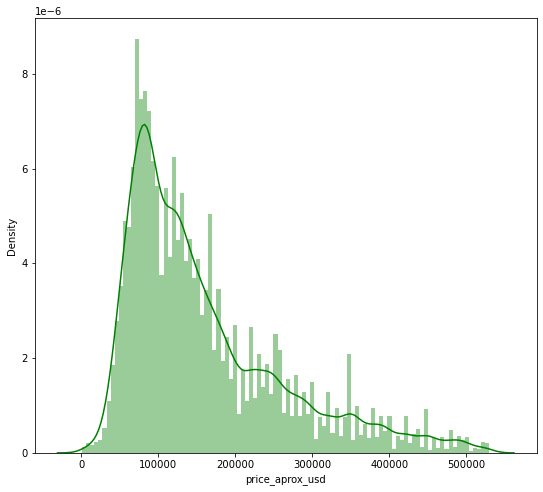

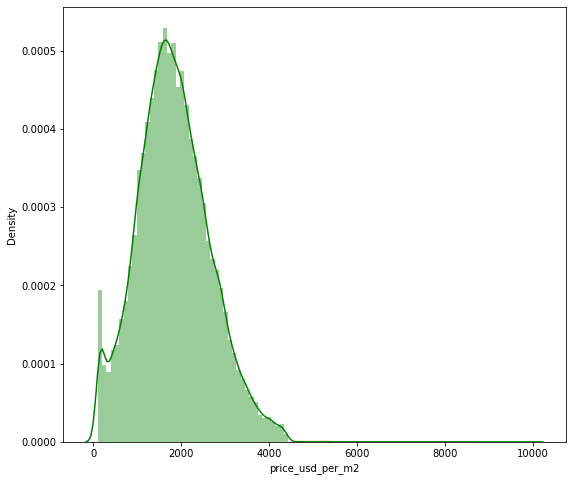

In [158]:
import matplotlib.pyplot as plt
print(data['price_aprox_usd'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['price_aprox_usd'], color='g', bins=100, hist_kws={'alpha': 0.4});

plt.figure(figsize=(9, 8))
sns.distplot(data['price_usd_per_m2'], color='g', bins=100, hist_kws={'alpha': 0.4});

array([[<AxesSubplot:title={'center':'geonames_id'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>],
       [<AxesSubplot:title={'center':'price_aprox_usd'}>,
        <AxesSubplot:title={'center':'surface_total_in_m2'}>,
        <AxesSubplot:title={'center':'surface_covered_in_m2'}>],
       [<AxesSubplot:title={'center':'price_usd_per_m2'}>,
        <AxesSubplot:title={'center':'rooms_per_m2'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'expenses'}>,
        <AxesSubplot:title={'center':'fecha'}>, <AxesSubplot:>]],
      dtype=object)

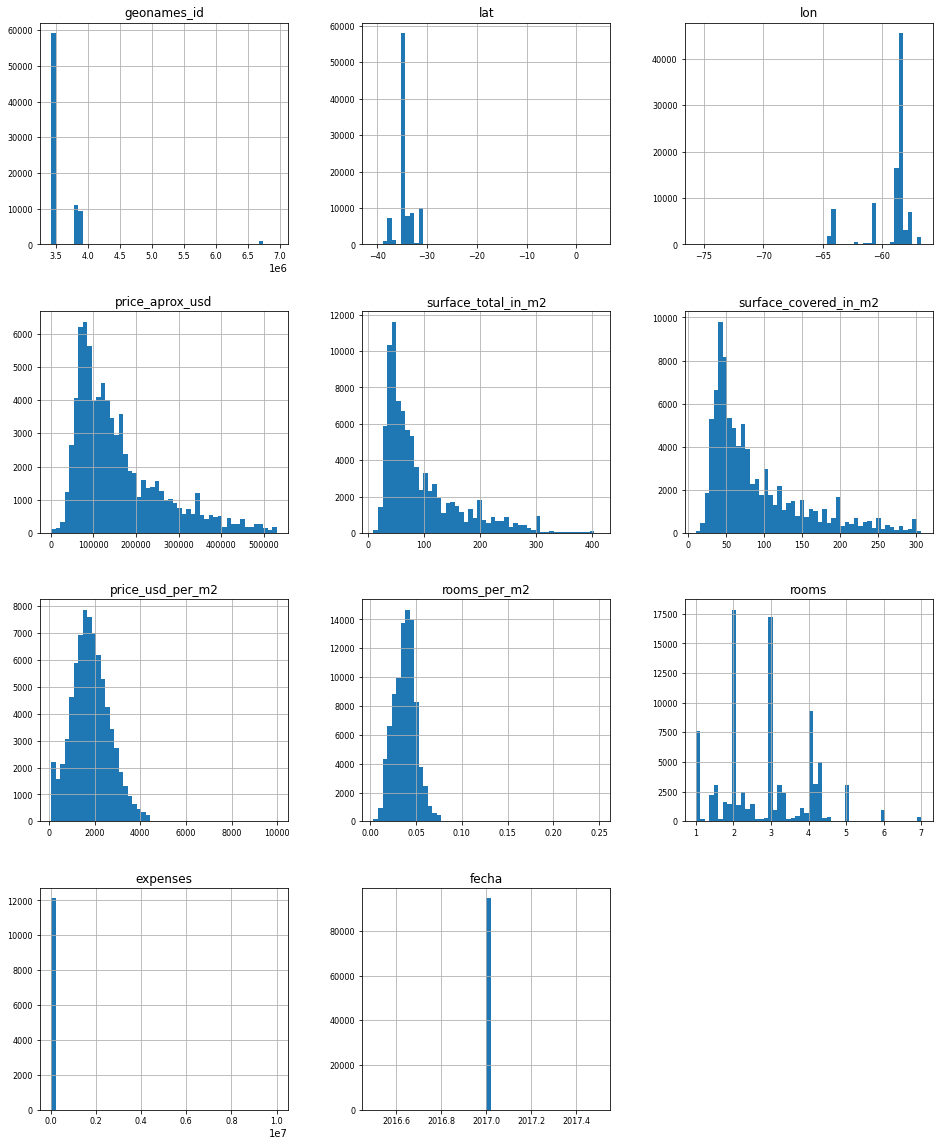

In [159]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [160]:
data_num_corr = data.corr()['price_usd_per_m2']
data_num_corr

geonames_id             -0.115696
lat                     -0.118468
lon                      0.276468
price_aprox_usd          0.268770
surface_total_in_m2     -0.367381
surface_covered_in_m2   -0.341924
price_usd_per_m2         1.000000
rooms_per_m2             0.219042
rooms                   -0.285019
expenses                 0.020151
fecha                         NaN
Name: price_usd_per_m2, dtype: float64

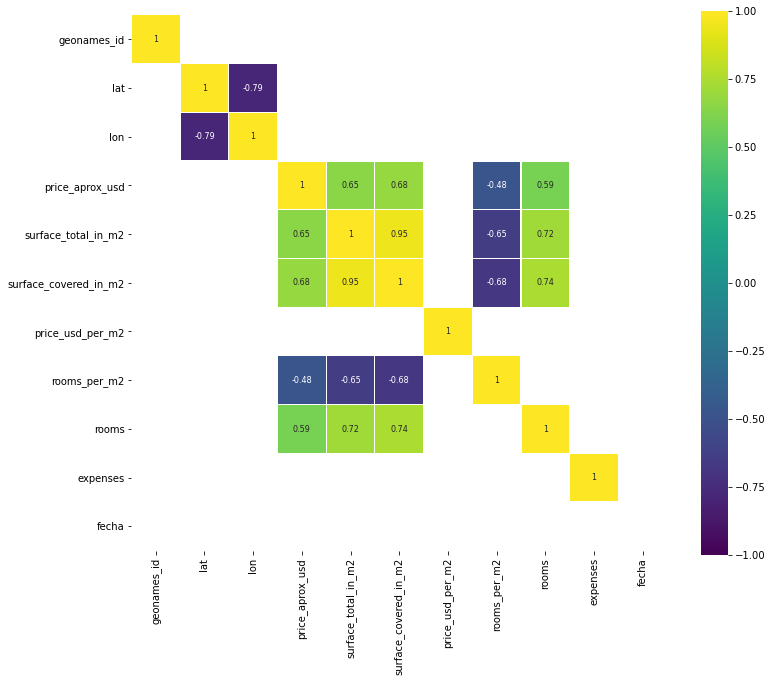

In [161]:
corr = data.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);